# Importing All the libraries that are required in this project

In [17]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

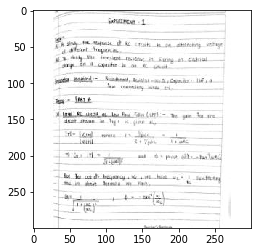

In [18]:
#Set the Data Dir. to path of training set

datadir= (r"C:/Data Set/dataset1/dataset1/train")
categories = ["notes", "non-notes"]
for category in categories:
    path=os.path.join(datadir, category)    #gets us the path to iterate over both the categories
    for img in os.listdir(path):
        img_arr= cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)  #Reading each image using CV2
        plt.imshow(img_arr,cmap ="gray")
        plt.show()
        break
        
    break
    print(img_arr.shape)

In [19]:
#resizing the image using cv2

img_size=300
new_arr=cv2.resize(img_arr,(img_size,img_size))

In [20]:
print(img_arr.shape)

(300, 300)


In [21]:
#Creating Training Data

training_data= []
def create_training_data():
    for category in categories:
        path=os.path.join(datadir,category)   #gets us the path to iterate over both the categories
        class_num= categories.index(category)  #Assigns 0 and 1 to notes and non-notes
        for img in os.listdir(path):
            try:
                img_arr=cv2.imread(os.path.join(path, img),cv2.IMREAD_COLOR)  #Reading Each image using cv2
                new_arr=cv2.resize(img_arr,(img_size,img_size))
                training_data.append([img_arr,class_num])
            except Exception as e:                #Precaution for broken images
                pass 
create_training_data()

#Shuffling the images for better training

print(len(training_data))
import random 
random.shuffle(training_data)   #Shuffling the notes and non-notes images for better training 
x_train=[]
y_train=[]

#x for features and y for labels

for features, labels in training_data:
    x_train.append(features)
    y_train.append(labels)
    
    #Using Keras x has to be numpy
    
x_train=np.array(features).reshape(-1,300,300,3)
y_train=np.array(labels).reshape(-1)         

print(x_train.shape)    
    

1518
(1, 300, 300, 3)


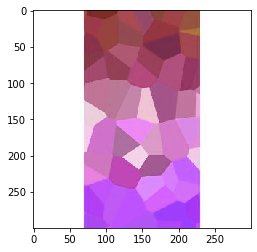

(300, 300, 3)
0


ValueError: could not broadcast input array from shape (300,300,3) into shape (300,300)

In [22]:
#Creating Validation set

datadir= (r"C:/Data Set/dataset1/dataset1/train")   #for Validation setting path to Train Directory 
categories= ["non-notes","notes"]
img_size= 128

for category in categories:
    path= os.path.join(datadir,category) #Path to notes and non-notes
    for img in os.listdir(path):
        img_arr=cv2.imread(os.path.join(path,img))
        plt.imshow(img_arr)
        plt.show()
        break
    break
    
print(img_arr.shape)

val_data=[]
def create_val_data():
    for category in categories:
        path= os.path.join(datadir,category)
        class_num=categories.index(category)
        for img in os.listdir(path):
            try:
                img_arr= cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_arr= cv2.resize(img_arr,(img_size,img_size))
                training_data.append([img_arr,class_num]) 
    
            except Exception as e:
             pass

    
create_val_data()
print(len(val_data))

x_val=[]
y_val=[]
for features, label in training_data:
        x_val.append(features)
        y_val.append(label)
x_val= np.array(x_val).reshape(-1,300,300,3)
y_val=np.array(y_val).reshape(-1)
x_val.shape
    

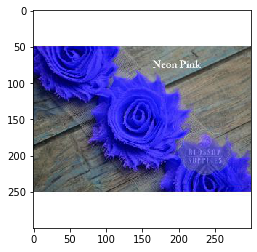

51


(51,)

In [23]:
#Now set the Path of directory where test images are located 

datadir= (r"C:/Data Set/dataset1/dataset1/test")
img_size=300

#Creating the test data as same way as done for training data

categories= ["testset"]
for category in categories:
    path= os.path.join(datadir,category)
    for img in os.listdir(path):
        img_arr = cv2.imread(os.path.join(path,img), cv2.IMREAD_COLOR)   #reading each image using cv2
        plt.imshow(img_arr)
        plt.show()
        break
    break
    
test_data =[]

def create_test_data():
    for category in categories:
        path= os.path.join(datadir,category)   #gets us the path to iterate over both the categories
        class_num= categories.index(category)  #assigns 0 and 1 to notes and non-notes
        for img in os.listdir(path):
            
            try:
                
                img_arr=cv2.imread(os.path.join(path,img),cv2.IMREAD_COLOR)
                img_arr=cv2.resize(img_arr,(img_size,img_size))
                test_data.append([img_arr ,class_num])
            except Exception as e:
                    pass
                #Precaution for broken Images 
create_test_data()
print(len(test_data))

import random 
random.shuffle(test_data)

x_test=[]
y_test=[]

for features,labels in test_data:
    x_test.append(features)
    y_test.append(labels)

x_test= np.array(x_test).reshape(-1,300,300,1)
y_test= np.array(y_test).reshape(-1)
y_test.shape

In [24]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01), input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(256, (3,3), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(512, (3,3), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 71, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 35, 35, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 33, 33, 256)       295168    
__________

In [26]:
from tensorflow.keras.optimizers import SGD
model.compile(optimizer = SGD(lr = 0.05),
             loss = 'binary_crossentropy',
             metrics= ['accuracy'])

In [27]:
#Training the Model

model.fit(x_train,y_train,batch_size=16, epochs=20)

Epoch 1/20
1/1 [==============================] - 2s 2s/sample - loss: 11.0460 - acc: 0.0000e+00
Epoch 2/20
1/1 [==============================] - 0s 288ms/sample - loss: 13.5031 - acc: 1.0000
Epoch 3/20
1/1 [==============================] - 0s 254ms/sample - loss: 13.4761 - acc: 1.0000
Epoch 4/20
1/1 [==============================] - 0s 274ms/sample - loss: 13.4492 - acc: 1.0000
Epoch 5/20
1/1 [==============================] - 0s 272ms/sample - loss: 13.4223 - acc: 1.0000
Epoch 6/20
1/1 [==============================] - 0s 283ms/sample - loss: 13.3954 - acc: 1.0000
Epoch 7/20
1/1 [==============================] - 0s 251ms/sample - loss: 13.3687 - acc: 1.0000
Epoch 8/20
1/1 [==============================] - 0s 260ms/sample - loss: 13.3419 - acc: 1.0000
Epoch 9/20
1/1 [==============================] - 0s 261ms/sample - loss: 13.3153 - acc: 1.0000
Epoch 10/20
1/1 [==============================] - 0s 257ms/sample - loss: 13.2887 - acc: 1.0000
Epoch 11/20
1/1 [=====================

In [28]:
#Saving the Entire Model
#which contains model architecture, model weights, training configuration etc,

model.save('notesp_model.h5')

In [29]:
model.save_weights("notes_weights.h5")